<center>
<h1> Examples for MITgcm PreSWOT Dataset in Simons CMAP </h1>
</center>

*Mohammad D. Ashkezari*



<br/><br/><br/>

<a href="https://colab.research.google.com/github/simonscmap/pycmap/blob/master/docs/PreSWOT.ipynb"><img align="left" src="colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/simonscmap/pycmap/master?filepath=docs%2FPreSWOT.ipynb"><img align="right" src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" title="Open and Execute in Binder"></a>

<a class="anchor" id="toc"></a>

## Table of Contents:
* [Installation](#installation)
* [**Data Retrieval (selected methods)**](#dataRetrieval)
    * [API](#api) 
    * [Subset by Space-Time](#spaceTime)
    * [Simple Maps](#simpleMaps)
    * [TimeSeries](#timeSeries)
    * [Depth Profile](#depthProfile)
    * [Sampling](#sample)   
    * [Custom SQL Query](#query)
    
    

<a class="anchor" id="dataRetrieval"></a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<center>
<h1> API: Data Retrieval </h1>
</center>
<br/><br/><br/><br/><br/><br/><br/><br/>

<a class="anchor" id="installation"></a> 
<a href="#toc" style="float: right;">Table of Contents</a>
## Installation
pycmap can be installed using *pip*: 
<br />`pip install pycmap`

In order to use pycmap, you will need to obtain an API key from SimonsCMAP website:
<a href="https://simonscmap.com">https://simonscmap.com</a>.

### Note:
You may install pycmap on cloud-based jupyter notebooks (such as [Colab](https://colab.research.google.com/)) by running the following command in a code-block: 
<br />`!pip install pycmap`

In [1]:
# !pip install pycmap -q    #uncomment to install pycmap on Colab
import pycmap
pycmap.__version__

'0.2.16'

<a class="anchor" id="api"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*API( )*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/pycmap_api.html#pycmapapi)
To retrieve data, we need to create an instance of the system's API and pass the API key. It is not necessary to pass the API key every time you run pycmap, because the key will be stored locally. The API class has other optional parameters to adjust its behavior. All parameters can be updated persistently at any point in the code.

Register at https://simonscmap.com and get and API key, if you haven't already.

In [48]:
api = pycmap.API(token="preSWOT")

<a class="anchor" id="spaceTime"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*space_time(table, variable, dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2)*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_subset_ST.html#subset-st)

Returns a subset of data according to the specified space-time constraints (dt1, dt2, lat1, lat2, lon1, lon2, depth1, depth2).
<br />The results are ordered by time, lat, lon, and depth (if exists), respectively.

> **Parameters:** 
>> **table: string**
>>  <br />Table name (each dataset is stored in a table). A full list of table names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**variable: string**
>>  <br />Variable short name which directly corresponds to a field name in the table. A subset of this variable is returned by this method according to the spatio-temporal cut parameters (below). Pass **'\*'** wild card to retrieve all fields in a table. A full list of variable short names can be found in [catalog](https://simonscmap.com/catalog).
>> <br />
>> <br />**dt1: string**
>>  <br />Start date or datetime. This parameter sets the lower bound of the temporal cut. <br />Example values: '2016-05-25' or '2017-12-10 17:25:00'
>> <br />
>> <br />**dt2: string**
>>  <br />End date or datetime. This parameter sets the upper bound of the temporal cut. 
>> <br />
>> <br />**lat1: float**
>>  <br />Start latitude [degree N]. This parameter sets the lower bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lat2: float**
>>  <br />End latitude [degree N]. This parameter sets the upper bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lon1: float**
>>  <br />Start longitude [degree E]. This parameter sets the lower bound of the zonal cut. Note longitue ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**lon2: float**
>>  <br />End longitude [degree E]. This parameter sets the upper bound of the zonal cut. Note longitue ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**depth1: float**
>>  <br />Start depth [m]. This parameter sets the lower bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**depth2: float**
>>  <br />End depth [m]. This parameter sets the upper bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**servers: list of str**
>>  <br />(optional) A list aliases of the hosting servers.


>**Returns:** 
>>  Pandas dataframe.


### Example:
This example retrieves a subset of KPPhbl from the MITgcm_SWOT_ACC_SMST dataset. <br>
KPPhbl: ocean_mixed_layer_thickness_defined_by_mixing_scheme

In [3]:
api.space_time(
              table="tblMITgcm_SWOT_2D", 
              variable="KPPhbl", 
              dt1="2012-05-01", 
              dt2="2012-05-01", 
              lat1=-58, 
              lat2=-57, 
              lon1=148, 
              lon2=149, 
              depth1=0, 
              depth2=0,
              servers=["mariana"]
              ) 

,time,lat,lon,KPPhbl
0,2012-05-01T00:00:00,-57.497677,148.01042,42.799267
1,2012-05-01T00:00:00,-57.497677,148.03125,43.310516
2,2012-05-01T00:00:00,-57.497677,148.05208,43.622726
3,2012-05-01T00:00:00,-57.497677,148.07292,43.646702
4,2012-05-01T00:00:00,-57.497677,148.09375,43.270309
...,...,...,...,...
2203,2012-05-01T00:00:00,-57.001026,148.90625,14.875319
2204,2012-05-01T00:00:00,-57.001026,148.92708,15.372295
2205,2012-05-01T00:00:00,-57.001026,148.94792,15.781294
2206,2012-05-01T00:00:00,-57.001026,148.96875,15.799750


<a class="anchor" id="simpleMaps"></a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<center>
<h1> Simple Maps </h1>
</center>
<br/><br/><br/><br/><br/><br/><br/><br/>
<a href="#toc" style="float: right;">Table of Contents</a>

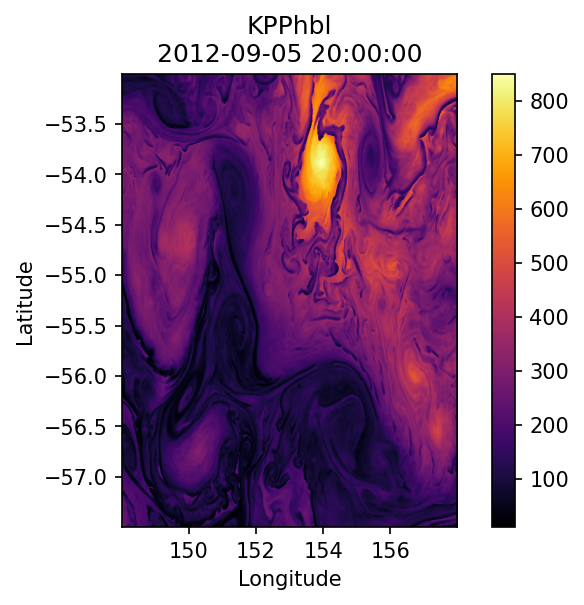

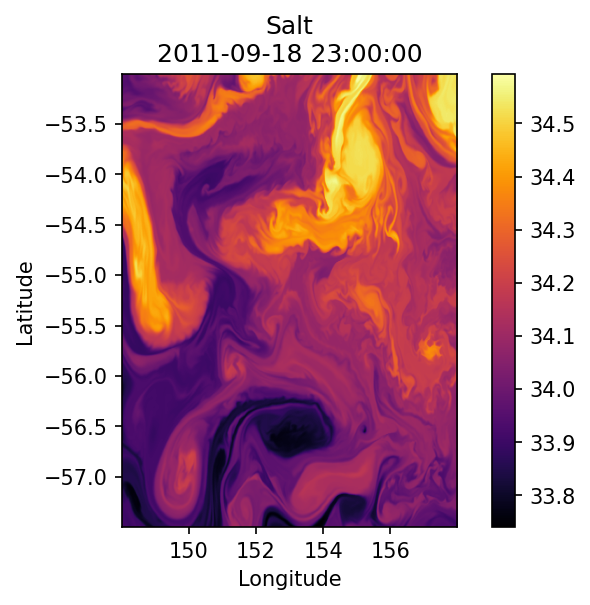

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




def plot(df, vname, dt):
    plt.figure(dpi=150)
    lat = df.lat.unique()
    lon = df.lon.unique()
    shape = (len(lat), len(lon))
    data = df[vname].values.reshape(shape)
    im = plt.imshow(data, 
              extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)], 
              cmap="inferno", origin="lower", aspect=3
              )
    plt.title(f"{vname}\n{dt}")
    plt.colorbar()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
    return


def basic_map_2Dvar(varName, dt):
    """ 
    create a basic surface map.
    `space_time` returns a subset of data in form of pandas dataframe (`df`). 
    for the sake of this example, keep `dt1`, and `dt2` the same.
    """
    df = api.space_time(
                      table="tblMITgcm_SWOT_2D",
                      variable=varName,
                      dt1=dt,
                      dt2=dt,
                      lat1=-58,
                      lat2=-53,
                      lon1=148,
                      lon2=158,
                      depth1=0,
                      depth2=0,
                      servers=["rossby"]
                      )
    plot(df, varName, dt)
    return



def basic_map_3Dvar(varName, dt):
    """ 
    `space_time` returns a subset of data in form of pandas dataframe (`df`). 
    for the sake of this example, keep `dt1`, and `dt2` the same.
    """
    df = api.space_time(
                      table="tblMITgcm_SWOT_3D",
                      variable=varName,
                      dt1=dt,
                      dt2=dt,
                      lat1=-58,
                      lat2=-53,
                      lon1=148,
                      lon2=158,
                      depth1=0,
                      depth2=1,
                      servers=["rossby"]
                      )
    plot(df, varName, dt)
    return




basic_map_2Dvar(varName="KPPhbl", dt="2012-09-05 20:00:00")
basic_map_3Dvar(varName="Salt", dt="2011-09-18 23:00:00")


<a class="anchor" id="timeSeries"></a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<center>
<h1> TimeSeries </h1>
</center>
<br/><br/><br/><br/><br/><br/><br/><br/>
<a href="#toc" style="float: right;">Table of Contents</a>

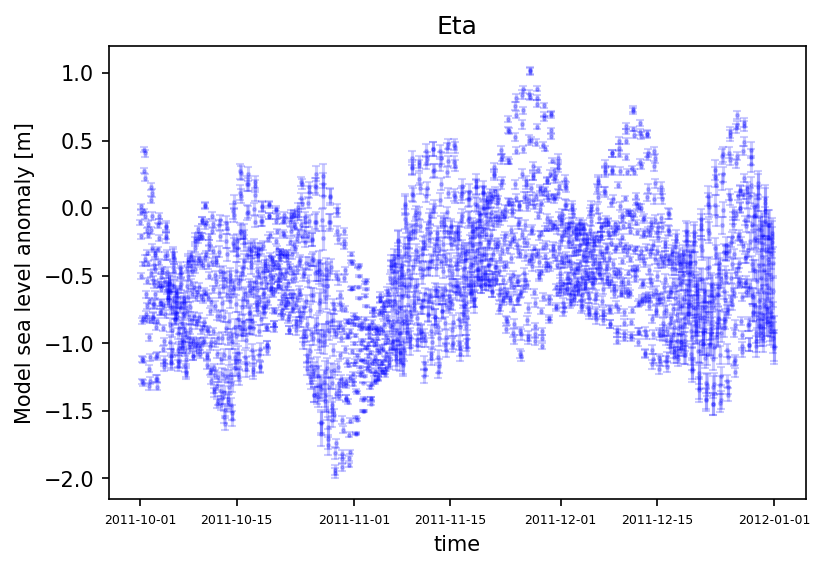

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

def ts_plot(df, table, varName):
    plt.figure(dpi=150)
    df["time"]= pd.to_datetime(df["time"])
    plt.errorbar(df["time"], df[varName], yerr=df[f"{varName}_std"], fmt='ob', capsize=2, markersize=1.5, alpha=0.2)
    plt.title(varName)
    plt.xlabel("time")
    plt.ylabel(api.get_var_long_name(table, varName) + api.get_unit(table, varName))
    plt.xticks(fontsize=6)  
    return 


table, varName = "tblMITgcm_SWOT_2D", "Eta"
df = api.time_series(
                    table=table,
                    variable=varName,
                    dt1="2011-10-01 00:00:00",
                    dt2="2012-01-01 00:00:00",
                    lat1=-55,
                    lat2=-54.7,
                    lon1=150,
                    lon2=150.3,
                    depth1=0,
                    depth2=0,
                    interval=None,
                    servers=["rossby"]
                    )  

ts_plot(df, table, varName)

<a class="anchor" id="depthProfile"></a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<center>
<h1> Depth Profile </h1>
</center>
<br/><br/><br/><br/><br/><br/><br/><br/>
<a href="#toc" style="float: right;">Table of Contents</a>

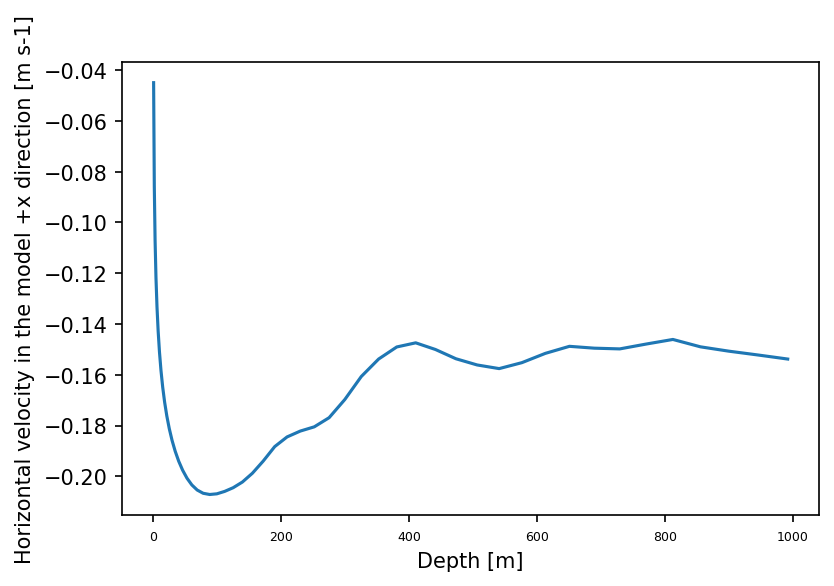

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

def dp_plot(df, table, varName):
    plt.figure(dpi=150)
    plt.plot(df['depth'], df[varName])    
    plt.xlabel('Depth [m]')
    plt.ylabel(api.get_var_long_name(table, varName) + api.get_unit(table, varName))
    plt.xticks(fontsize=6)  
    return 


table, varName = "tblMITgcm_SWOT_3D", "U"
df = api.depth_profile(
                       table=table,
                       variable=varName,
                       dt1="2011-10-01 00:00:00",
                       dt2="2011-10-01 00:00:00",
                       lat1=-55,
                       lat2=-54.5,
                       lon1=150,
                       lon2=150.5,
                       depth1=0,
                       depth2=1000,
                       servers=["rossby"]
                       )  

dp_plot(df, table, varName)

<a class="anchor" id="simpleMaps"></a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<center>
<h1> Sampling </h1>
</center>
<br/><br/><br/><br/><br/><br/><br/><br/>

<a class="anchor" id="sample"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## Custom Colocalization (Sampling):
<code>Sample(source, targets, replaceWithMonthlyClimatolog, servers)<code/>

<br />Samples the targest datasets at any arbitrary location-time (defined by `source`).
<br />Returns a dataframe containing the original sampling points joined with the target variables.
<br />



> **Parameters:** 
>> **source: dataframe**
>>  <br />A dataframe containing the source datasets (must have time-location columns). It should have the following columns: "time", "lat", "lon", "depth" columns. See the example "samplingPoints.csv" file.
>> <br />
>> <br />**targets: dict**
>>  <br />A dcitionary containing the target table/variables and the tolerance parameters. The items in `tolerances` list are: temporal tolerance [days], meridional tolerance [deg], 
>>    zonal tolerance [deg], and vertical tolerance [m], repectively.
>>    Below is an example for `targets` parameter:<br />
>>    <br />targets = {
>>    <br />        "tblSST_AVHRR_OI_NRT": {
>>    <br />                                "variables": ["sst"],
>>    <br />                                "tolerances": [1, 0.25, 0.25, 5]
>>    <br />                                },
>>    <br />        "tblAltimetry_REP": {
>>    <br />                                "variables": ["sla", "adt", "ugosa", "vgosa"],
>>    <br />                                "tolerances": [1, 0.25, 0.25, 5]
>>    <br />                               }
>>    <br />        }
>> <br />
>> <br />**replaceWithMonthlyClimatolog: boolean**
>>  <br />This is not supported for MITgcm yet. Please set to `False`. 
>> <br />
>> <br />**servers: list of str**
>>  <br />(optional) A list aliases of the hosting servers.
>> <br />

>**Returns:** 
>>  Pandas dataframe.

In [20]:

targets = {
            "tblMITgcm_SWOT_2D": {
                                  "variables": ["Eta", "KPPhbl", "PhiBot", "oceFWflx", "oceQnet", "oceQsw", "oceTAUX", "oceTAUY"],
                                  "tolerances": [0, 0.1, 0.1, 0]
                                 },
            "tblWOA_Climatology": {
                                   "variables": ["sea_water_temp_WOA_clim", "density_WOA_clim", "salinity_WOA_clim", "nitrate_WOA_clim", "phosphate_WOA_clim", "silicate_WOA_clim", "oxygen_WOA_clim", "AOU_WOA_clim", "o2sat_WOA_clim", "conductivity_WOA_clim"],
                                   "tolerances": [0, 0.75, 0.75, 5]
                                  },    
            "tblPisces_NRT": {
                              "variables": ["NO3", "PO4", "Fe", "O2", "Si", "PP", "CHL", "PHYC"],
                              "tolerances": [4, 0.5, 0.5, 5]
                             },
            "tblModis_PAR": {
                            "variables": ["PAR"],
                            "tolerances": [4, 0.25, 0.25, 0]
                            },                                                                                                           
            }

df = pycmap.Sample(
                   source=pd.read_csv("samplingPoints.csv"), 
                   targets=targets, 
                   replaceWithMonthlyClimatolog=False,
                   servers=["rossby"]  
                   )
df.to_csv("samplingPoints_Colocalized.csv", index=False)

df

Gathering metadata .... 
Sampling starts.
Sampling tblModis_PAR ... 7 / 77Sampling tblPisces_NRT ... 3 / 7.. 6 / 7
Sampling ends.


,time,lat,lon,depth,CMAP_Eta_tblMITgcm_SWOT_2D,CMAP_KPPhbl_tblMITgcm_SWOT_2D,CMAP_PhiBot_tblMITgcm_SWOT_2D,CMAP_oceFWflx_tblMITgcm_SWOT_2D,CMAP_oceQnet_tblMITgcm_SWOT_2D,CMAP_oceQsw_tblMITgcm_SWOT_2D,...,CMAP_conductivity_WOA_clim_tblWOA_Climatology,CMAP_NO3_tblPisces_NRT,CMAP_PO4_tblPisces_NRT,CMAP_Fe_tblPisces_NRT,CMAP_O2_tblPisces_NRT,CMAP_Si_tblPisces_NRT,CMAP_PP_tblPisces_NRT,CMAP_CHL_tblPisces_NRT,CMAP_PHYC_tblPisces_NRT,CMAP_PAR_tblModis_PAR
0,5/1/12 0:00,-57.497677,148.01042,0,-0.946357,41.668436,253.661985,-0.000057,32.671540,-15.974147,...,2.976462,24.247249,1.770222,0.000015,347.989877,46.585647,0.003547,0.189622,1.109267,5.194164
1,5/1/12 1:00,-57.400000,148.30000,0,-1.016318,37.853229,270.586297,-0.000066,31.376795,-19.357922,...,2.979256,24.247249,1.770222,0.000015,347.989877,46.585647,0.003547,0.189622,1.109267,5.057719
2,5/1/12 2:00,-57.100000,149.10000,0,-1.092870,14.336801,417.031459,-0.000114,11.463094,-21.425405,...,3.011319,23.625106,1.728120,0.000015,341.946595,44.182038,0.003628,0.188640,1.097234,5.365793
3,5/1/12 3:00,-57.001026,149.50000,0,-0.867325,17.221478,354.197094,-0.000127,38.862950,-21.783851,...,3.017246,23.273330,1.704701,0.000015,339.762945,42.933993,0.003652,0.189229,1.094277,5.435127
4,5/1/12 4:00,-56.200000,150.00000,0,-0.446992,3.591056,392.305280,-0.000196,26.687310,-15.318805,...,3.094051,20.633554,1.527494,0.000015,322.608488,34.199909,0.004233,0.196671,1.115962,6.134454
5,5/1/12 5:00,-56.100000,150.30000,0,-0.232518,5.533529,378.093420,-0.000201,33.510072,-13.278528,...,3.103175,20.750725,1.535139,0.000015,323.329664,34.479433,0.004217,0.196472,1.104448,6.480423
6,5/1/12 6:00,-56.000000,151.00000,0,-0.256912,7.585349,366.624201,-0.000205,7.928275,-10.733341,...,3.112666,21.358681,1.574819,0.000015,328.224573,36.268772,0.004138,0.197597,1.115054,7.324201


<a class="anchor" id="dataRetrieval"></a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
<center>
<h1> Custom SQL Query (optional) </h1>
</center>
<br/><br/><br/><br/><br/><br/><br/><br/>

<a class="anchor" id="query"></a>
<a href="#toc" style="float: right;">Table of Contents</a>
## [*query(query)*](https://cmap.readthedocs.io/en/latest/user_guide/API_ref/pycmap_api/data_retrieval/pycmap_query.html#query)
<br />
You may query the MITgcm dataset (or any other CMAP dataset) using standard SQL. This allows for any custom sql-slicing/aggregation/analytics operations.


<br />
<br />
<br />

In [50]:
api.query("""
          select * from tblMITgcm_SWOT_3D 
          where
          [time] between '2011-10-01 00:00:00' and '2011-10-01 00:00:00'
          and lat between -55 and 54.8
          and lon between 155 and 155.2
          and depth < 1
          """, servers=["rossby"])

,time,lat,lon,depth,U,V,W,Theta,Salt
0,2011-10-01T00:00:00,-54.415302,155.01042,0.5,0.324511,0.358717,0.000069,6.684293,34.383022
1,2011-10-01T00:00:00,-54.415302,155.03125,0.5,0.397353,0.324782,0.000070,6.784414,34.398609
2,2011-10-01T00:00:00,-54.415302,155.05208,0.5,0.427832,0.345370,0.000070,6.799114,34.404686
3,2011-10-01T00:00:00,-54.415302,155.07292,0.5,0.413137,0.483592,0.000070,6.745771,34.399540
4,2011-10-01T00:00:00,-54.415302,155.09375,0.5,0.409564,0.602705,0.000070,6.646962,34.383114
...,...,...,...,...,...,...,...,...,...
1705,2011-10-01T00:00:00,-53.005670,155.11458,0.5,0.279039,0.328663,0.000065,6.738825,34.391983
1706,2011-10-01T00:00:00,-53.005670,155.13542,0.5,0.281335,0.354762,0.000065,6.764718,34.395519
1707,2011-10-01T00:00:00,-53.005670,155.15625,0.5,0.292380,0.408406,0.000065,6.745609,34.393444
1708,2011-10-01T00:00:00,-53.005670,155.17708,0.5,0.294298,0.457489,0.000065,6.733521,34.391819
